
Created on 2017-06-28
Updated on 2017-06-28
KNN：k近邻算法
Author: 小瑶
GitHub: https://github.com/apachecn/AiLearning



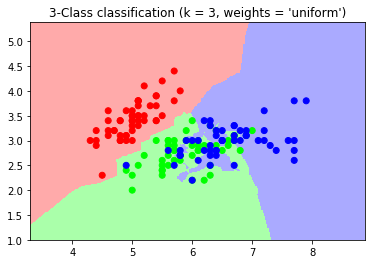

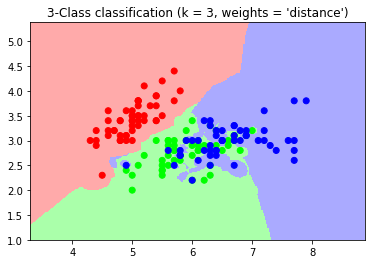

In [5]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

"""
Created on 2017-06-28
Updated on 2017-06-28
KNN：k近邻算法
Author: 小瑶
GitHub: https://github.com/apachecn/AiLearning
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# 导入一些要玩的数据
iris = datasets.load_iris()
X = iris.data[:, :2]  # 我们只采用前两个feature. 我们可以使用二维数据集避免这个丑陋的切片
y = iris.target

# print 'X=', type(X), X
# print 'y=', type(y), y

# X = array([[-1.0, -1.1], [-1.0, -1.0], [0, 0], [1.0, 1.1], [2.0, 2.0], [2.0, 2.1]])
# y = array([0, 0, 0, 1, 1, 1])

# print 'X=', type(X), X
# print 'y=', type(y), y

h = .02  # 网格中的步长

# 创建彩色的图
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # 我们创建了一个knn分类器的实例，并拟合数据。
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 绘制决策边界。为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    """
    xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
    is equivalent to:
    for i in range(nx):
        for j in range(ny):
            # treat xv[i,j], yv[i,j]
    """
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  
                         np.arange(y_min, y_max, h))
   
"""
    >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
    array([[1, 4],
           [2, 5],
           [3, 6]])
    """    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #np.ravel is equivalent to reshape(-1, order=order).

    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

    plt.show()

In [7]:
xx.ravel()

array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88])